<h3> Principal components analysis (PCA) for tourism data </h3>

In [230]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from seaborn import heatmap

import matplotlib.pyplot as plt
import numpy as np
from seaborn import heatmap
from seaborn import scatterplot
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler


<h5>Creating functions</h5>

In [247]:
def nan_replace_t(t):
    assert isinstance(t, pd.DataFrame)
    for v in t.columns:
        if any(t[v].isna()):
            if is_numeric_dtype(t[v]):
                t[v].fillna(t[v].mean(), inplace=True)
            else:
                t[v].fillna(t[v].mode()[0], inplace=True)

def tabelare_varianta(alpha):
    return pd.DataFrame(data={
        "Variance": alpha,
        "Cumulative variance": np.cumsum(alpha),
        "Procent variance": alpha * 100 / sum(alpha),
        "Procent cumulative variance": np.cumsum(alpha) * 100 / sum(alpha)
    }, index=["Comp " + str(v + 1) for v in range(len(alpha))])

        
def f_criterii(alpha, std=True, procent_minimal=80):
    m = len(alpha)
    k1 = np.where(np.cumsum(alpha) * 100 / sum(alpha) > procent_minimal)[0][0]
    # Criteriul Kaiser
    if std:
        k2 = np.where(alpha < 1)[0][0] - 1
    else:
        k2 = None
    return (k1, k2)


In [248]:
def plot_varianta(alpha, criterii, eticheta_x="Components"):
    m = len(alpha)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    assert isinstance(ax, plt.Axes)
    ax.set_title("Variance graph", fontdict={"fontsize": 16})
    ax.set_xlabel(eticheta_x)
    ax.set_ylabel("Variance")
    x = np.arange(1, m + 1)
    ax.set_xticks(x)
    ax.plot(x, alpha)
    ax.scatter(x, alpha, color="r")
    ax.axhline(alpha[criterii[0]], color="b", label="Minimum coverage criterion")
    if criterii[1] is not None:
        ax.axhline(1, color="m", label="Kaiser criterion")
    ax.legend()


def show():
    plt.show()

def corelograma(t, vmin=-1, cmap="RdYlBu", titlu="Correlations"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(titlu, fontdict={"fontsize": 16, "color": "b"})
    heatmap(t, vmin=vmin, vmax=1, cmap=cmap, annot=True, ax=ax)


<h5>Import data</h5>

- X1- Arrivals at tourist accomodation units
- X2- Nights spent at tourist accomodation capacity
- X3- Net occupancy rate of beds and bedrooms in hotels and similar units
- X4- Number of units
- X5- Road, rail, and navigable inland waterway networks
- X6- Stock vehicles by categories and regions
- X7- Victims in road accidents


In [249]:
tabel_date = pd.read_csv("date_turism.csv", index_col=0)
variabile_observate = list(tabel_date)[:]

In [250]:
nan_replace_t(tabel_date)

x = tabel_date[variabile_observate]

print(x)

           x1        x2     x3    x4    x5       x6     x7
COD                                                       
BE    7376417  20177486  23.92  9853  1763  6946638  36613
BE1    992289   1782873  20.27   397    11   582586   3703
BE10   992289   1782873  20.27   397    11   582586   3703
BE2   4431080  13276415  24.01  6144   883  4228665  22522
BE21   779057   2056957  18.91  1168   220  1102614   6460
...       ...       ...    ...   ...   ...      ...    ...
FI19  1720519   2927719  28.58   272   115  1207987   1219
FI1B  1568024   2842555  27.29   175   322  1092711   1037
FI1C  1255002   2217022  29.42   238   351   965052   1105
FI2     85279    160604  17.02    75     0    31642     42
FI20    85279    160604  17.02    75     0    31642     42

[107 rows x 7 columns]


<h5>PCA model</h5>

In [251]:
x = (x - np.mean(x,axis=0))/np.std(x,axis=0)
model_acp = PCA()
model_acp.fit(x)

PCA()

        Variance  Cumulative variance  Procent variance  \
Comp 1  4.715437             4.715437         67.363387   
Comp 2  1.205203             5.920640         17.217187   
Comp 3  0.465405             6.386045          6.648639   
Comp 4  0.305549             6.691594          4.364986   
Comp 5  0.150282             6.841876          2.146892   
Comp 6  0.101056             6.942932          1.443652   
Comp 7  0.057068             7.000000          0.815258   

        Procent cumulative variance  
Comp 1                    67.363387  
Comp 2                    84.580573  
Comp 3                    91.229212  
Comp 4                    95.594198  
Comp 5                    97.741090  
Comp 6                    99.184742  
Comp 7                   100.000000  


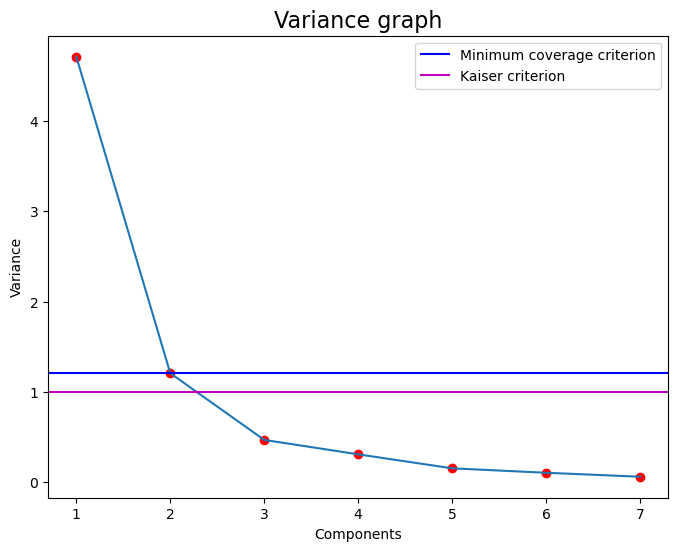

In [257]:
n,m = np.shape(x)
alpha = model_acp.explained_variance_*(n-1)/n
criterii = f_criterii(alpha,procent_minimal=80)
plot_varianta(alpha, criterii)
tabel_varianta = tabelare_varianta(alpha)
print(tabel_varianta)
show()

I have created a table which contains the variance of principal components and the percentage of them. We have also created a graph where which shows the number of principal components according to Kaiser criterion and Minimum Coverage criterion.
So, following the results obtained in both variance table and graph, we can will keep two components in analysis.

In [255]:
c = model_acp.transform(x)
s_c = c / np.sqrt(alpha)
t_s = pd.DataFrame(s_c, tabel_date.index, tabel_varianta.index)
print(t_s)

        Comp 1    Comp 2    Comp 3    Comp 4    Comp 5    Comp 6    Comp 7
COD                                                                       
BE    2.050273 -1.276339 -1.196491 -0.875131 -0.832733 -0.080675  4.545533
BE1  -0.810841 -0.802442 -0.811146  0.452790  0.450123 -0.164677 -0.191458
BE10 -0.810841 -0.802442 -0.811146  0.452790  0.450123 -0.164677 -0.191458
BE2   0.842816 -0.789383 -1.047806 -0.228278 -0.544908 -0.186225  3.076349
BE21 -0.642418 -1.138984 -0.795849  0.290086  0.422067 -0.151916  0.667733
...        ...       ...       ...       ...       ...       ...       ...
FI19 -0.640379  0.290637 -0.142784 -0.443876 -0.675803 -0.416879 -0.958695
FI1B -0.641782  0.056946  0.073108 -0.474301 -0.239968 -0.297413 -1.067991
FI1C -0.653195  0.307380  0.293237 -0.662331 -0.571764  0.159250 -0.824532
FI2  -1.066314 -1.211333 -0.631643  0.862491  0.906649 -0.535750 -0.305121
FI20 -1.066314 -1.211333 -0.631643  0.862491  0.906649 -0.535750 -0.305121

[107 rows x 7 columns]


I have also calculated the principal scores as you can see in the table from above.These scores show how each country is positioned in relation to each principal component. So, higher values in a particular principal component indicate a greater contribution to describe the variation observed for that country.

In [256]:
r = np.corrcoef(x,c,rowvar=False)[:m,m:]
t_r = pd.DataFrame(r,variabile_observate,t_s.columns)
print(t_r)

      Comp 1    Comp 2    Comp 3    Comp 4    Comp 5    Comp 6    Comp 7
x1  0.956341  0.068367 -0.143873  0.141098 -0.025992  0.020843 -0.197534
x2  0.859371  0.396242 -0.038438  0.124766  0.266836 -0.114034  0.056796
x3  0.261404  0.928382  0.169160 -0.152015 -0.118541  0.063051  0.004823
x4  0.887546 -0.133282  0.191043  0.341927 -0.182669  0.004228  0.087754
x5  0.766787 -0.344431  0.491548 -0.182793  0.111761  0.070414 -0.030392
x6  0.903587 -0.175409 -0.117906 -0.287446 -0.133433 -0.195272  0.017282
x7  0.895449 -0.120260 -0.350135 -0.118377  0.026280  0.201332  0.076657


Therefore, we observe that the most variables are correlated very well with the first principal component. There is only one exception with the variable "Net occupancy rate of beds and bedrooms in hotels and similar units" because this one is correlated with the second principal component.

Due to these correlations, we can rename the principal components:

- Principal component 1: Tourist capacity and transport
- Principal component 2: Occupancy of accomodation units